In [128]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [129]:
# Data Ingestion
with open('../data/scorecard/eae7163d-b06c-41df-95fb-835fd5b9798b.json', 'r') as f:
    data = json.load(f)

In [130]:
inn1 = data[0]
inn2 = data[1]

## Analysis - Innings 1

In [131]:
batting = pd.DataFrame.from_records(inn1['batting'])
batting

,batsman,dismissal,bowler,catcher,dismissal-text,r,b,4s,6s,sr,
0,"{'id': 'a6686871-5bcd-4aae-8bfc-8298f878b6a9',...",catch,"{'id': '93eaaabd-7529-44cb-a8c7-52acd30ea54e',...","{'id': '151d6979-05d3-4c1f-ae30-0e58af0e8613',...",c ayush badoni b digvesh rathi,58,32,6,4,181.25,0
1,"{'id': '03bda674-3916-4d64-952e-00a6c19c01e1',...",catch,"{'id': '95bbca5a-f097-43dc-9a47-bdb85f02fb1a',...","{'id': 'a67a5fef-c1d6-4264-a6a6-c1984489bd36',...",c prince yadav b mayank yadav,12,5,0,2,240.00,0
2,"{'id': 'c510fbe6-8a16-47e4-ab60-0965720241af',...",bowled,"{'id': 'a67a5fef-c1d6-4264-a6a6-c1984489bd36',...",NaN,b prince yadav,29,21,3,1,138.10,0
3,"{'id': '8c579447-bfbd-4cf6-a283-db4dc1d5ac33',...",catch,"{'id': '332200ad-d1f8-4035-95c5-b33bd1c9a939',...","{'id': '6eaac800-13e7-4a07-8ee2-14acd04cc53f',...",c mitchell marsh b avesh khan,54,28,4,4,192.86,0
4,"{'id': 'aefd9074-da5a-408d-94f1-3be0e79d3b82',...",catch,"{'id': '9a71201c-c377-45aa-a355-1af6d2c4bae3',...","{'id': 'a67a5fef-c1d6-4264-a6a6-c1984489bd36',...",c prince yadav b ravi bishnoi,6,5,1,0,120.00,0
5,"{'id': 'a90b2371-5c53-4c29-a382-9b52d40a7548',...",bowled,"{'id': '95bbca5a-f097-43dc-9a47-bdb85f02fb1a',...",NaN,b mayank yadav,5,7,0,0,71.43,0
6,"{'id': '71add5ac-55f9-4eb7-9e0c-d51208ae20c0',...",NaN,NaN,NaN,not out,25,11,2,2,227.27,0
7,"{'id': 'f1dea685-fa68-4339-b582-ba70839e5ca9',...",catch,"{'id': '332200ad-d1f8-4035-95c5-b33bd1c9a939',...","{'id': '4e8ab9cd-c5af-430e-887b-d22bf74ad052',...",c pooran b avesh khan,20,10,2,1,200.00,0
8,"{'id': '237a1ef2-1eae-4877-8b94-d20d84faf635',...",NaN,NaN,NaN,not out,1,1,0,0,100.00,0


In [132]:
batting.batsman = pd.json_normalize(batting.batsman)['name']
batting.bowler = pd.json_normalize(batting.bowler)['name']
batting.catcher = pd.json_normalize(batting.catcher)['name']

In [133]:
batting

,batsman,dismissal,bowler,catcher,dismissal-text,r,b,4s,6s,sr,
0,Ryan Rickelton,catch,Digvesh Singh Rathi,Ayush Badoni,c ayush badoni b digvesh rathi,58,32,6,4,181.25,0
1,Rohit Sharma,catch,Mayank Yadav,Prince Yadav,c prince yadav b mayank yadav,12,5,0,2,240.00,0
2,Will Jacks,bowled,Prince Yadav,NaN,b prince yadav,29,21,3,1,138.10,0
3,Suryakumar Yadav,catch,Avesh Khan,Mitchell Marsh,c mitchell marsh b avesh khan,54,28,4,4,192.86,0
4,Tilak Varma,catch,Ravi Bishnoi,Prince Yadav,c prince yadav b ravi bishnoi,6,5,1,0,120.00,0
5,Hardik Pandya,bowled,Mayank Yadav,NaN,b mayank yadav,5,7,0,0,71.43,0
6,Naman Dhir,NaN,NaN,NaN,not out,25,11,2,2,227.27,0
7,Corbin Bosch,catch,Avesh Khan,Nicholas Pooran,c pooran b avesh khan,20,10,2,1,200.00,0
8,Deepak Chahar,NaN,NaN,NaN,not out,1,1,0,0,100.00,0


In [134]:
bowling = pd.DataFrame.from_records(inn1['bowling'])
bowling.bowler = pd.json_normalize(bowling.bowler)['name']

In [135]:
bowling

,bowler,o,m,r,w,nb,wd,eco
0,Mayank Yadav,4,0,40,2,0,4,10.0
1,Prince Yadav,4,0,44,1,0,1,11.0
2,Digvesh Singh Rathi,4,0,48,1,0,0,12.0
3,Ravi Bishnoi,4,0,41,1,0,0,10.2
4,Avesh Khan,4,0,42,2,0,0,10.5


In [136]:
total_runs = batting['r'].sum()
total_balls = batting['b'].sum()
team_strike = (total_runs / total_balls) * 100
dismissals = batting['dismissal'].notna().sum()

print(f'Total Runs: {total_runs}')
print(f'Total Balls Faced: {total_balls}')
print(f'Team Strike Rate: {team_strike:.2f}')
print(f'Total Dismissals: {dismissals}')

Total Runs: 210
Total Balls Faced: 120
Team Strike Rate: 175.00
Total Dismissals: 7


dismissal
catch     5
bowled    2
Name: count, dtype: int64


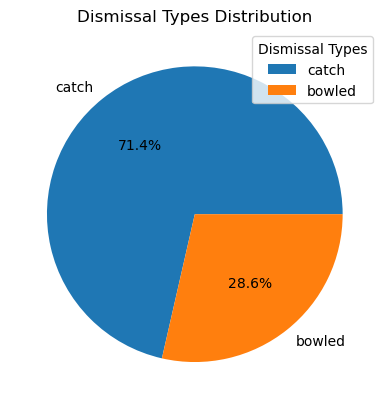

In [137]:
dismissal_counts = batting['dismissal'].value_counts()
print(dismissal_counts)

plt.pie(
    dismissal_counts,
    labels=dismissal_counts.index,
    autopct='%1.1f%%'
)

plt.title('Dismissal Types Distribution')
plt.legend(title='Dismissal Types')

,batsman,4s,6s
0,Corbin Bosch,2,1
1,Deepak Chahar,0,0
2,Hardik Pandya,0,0
3,Naman Dhir,2,2
4,Rohit Sharma,0,2
5,Ryan Rickelton,6,4
6,Suryakumar Yadav,4,4
7,Tilak Varma,1,0
8,Will Jacks,3,1


Total 4s: 18
Total 6s: 14


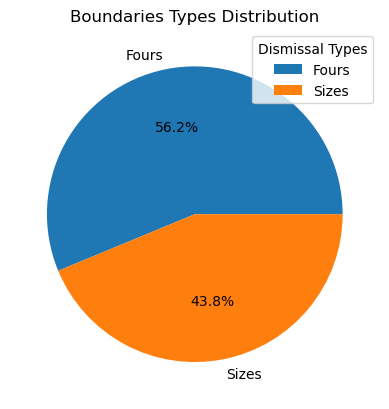

In [138]:
boundaries = batting.groupby('batsman')[['4s', '6s']].sum().reset_index()
display(boundaries)
print(f'Total 4s: {boundaries['4s'].sum()}')
print(f'Total 6s: {boundaries['6s'].sum()}')

plt.pie(
    [boundaries['4s'].sum(), boundaries['6s'].sum()],
    labels=['Fours', 'Sizes'],
    autopct='%1.1f%%'
)

plt.title('Boundaries Types Distribution')
plt.legend(title='Dismissal Types')

### Batsman Performance

<Axes: title={'center': 'Batsman Performance (Runs)'}, xlabel='batsman', ylabel='Runs'>

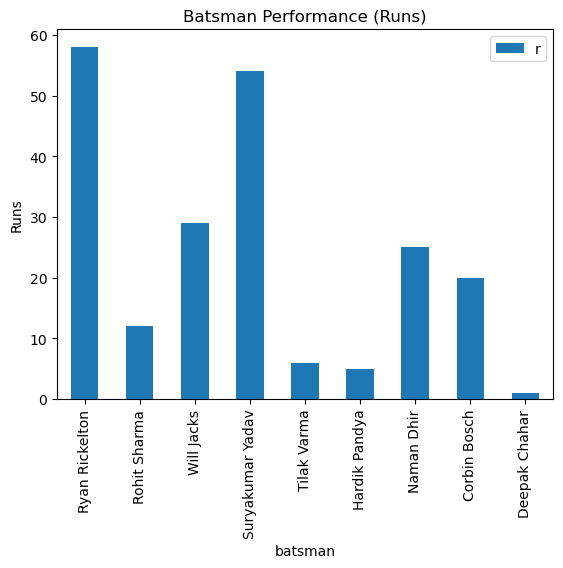

In [139]:
batting[['batsman','r']].plot(
    kind='bar',
    x='batsman',
    ylabel='Runs',
    title='Batsman Performance (Runs)'
)

<Axes: title={'center': 'Batsman Performance (Strike Rate)'}, xlabel='batsman', ylabel='Runs'>

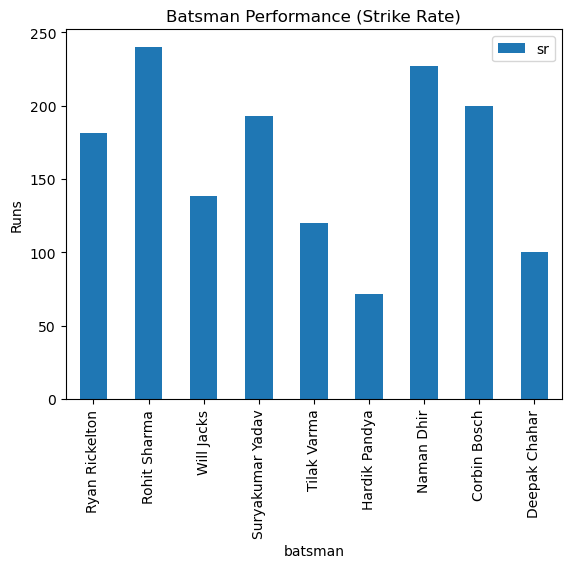

In [140]:
batting[['batsman','sr']].plot(
    kind='bar',
    x='batsman',
    ylabel='Runs',
    title='Batsman Performance (Strike Rate)'
)

### Bowler Performance

<Axes: title={'center': 'Bowler Performance (Runs Conceded including Extras)'}, xlabel='bowler', ylabel='Runs'>

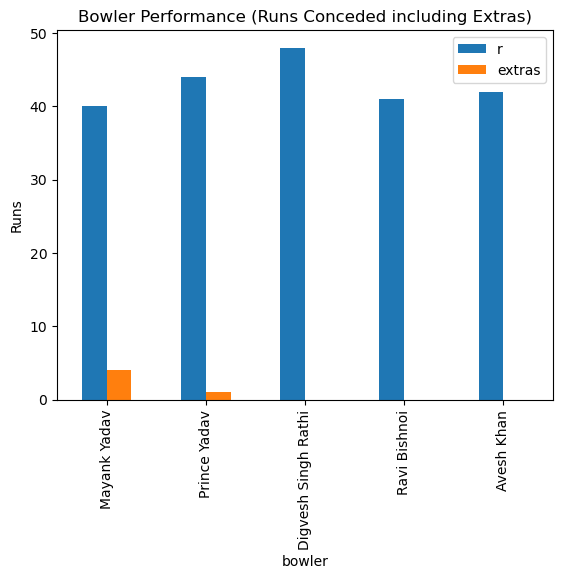

In [141]:
bowling['extras'] = bowling['nb'] + bowling['wd']

bowling[['bowler', 'r', 'extras']].plot(
    kind = 'bar',
    x = 'bowler',
    ylabel = 'Runs',
    title='Bowler Performance (Runs Conceded including Extras)'
)

<Axes: title={'center': 'Bowler Performance (Economy Rate)'}, xlabel='bowler', ylabel='Runs Economy'>

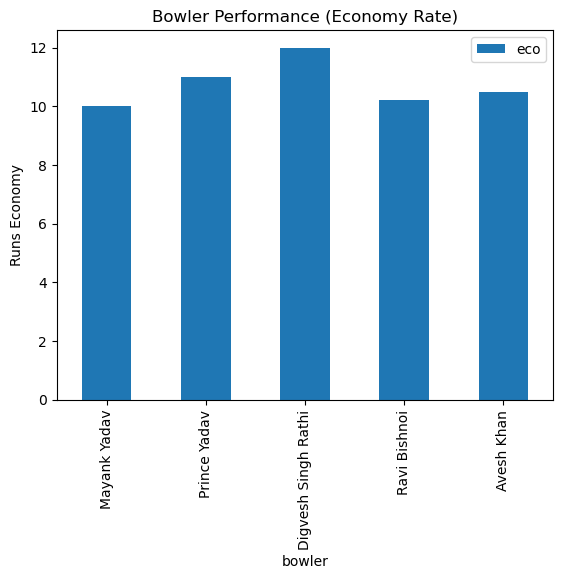

In [142]:
bowling[['bowler','eco']].plot(
    kind='bar',
    x='bowler',
    ylabel='Runs Economy',
    title='Bowler Performance (Economy Rate)'
)

### Fielder Performance

batsman,Corbin Bosch,Rohit Sharma,Ryan Rickelton,Suryakumar Yadav,Tilak Varma
catcher,,,,,
Ayush Badoni,0.0,0.0,1.0,0.0,0.0
Mitchell Marsh,0.0,0.0,0.0,1.0,0.0
Nicholas Pooran,1.0,0.0,0.0,0.0,0.0
Prince Yadav,0.0,1.0,0.0,0.0,1.0


<Axes: title={'center': 'Catcher by Fielder (catcher) vs Batsman'}, xlabel='catcher', ylabel='Number of Catches'>

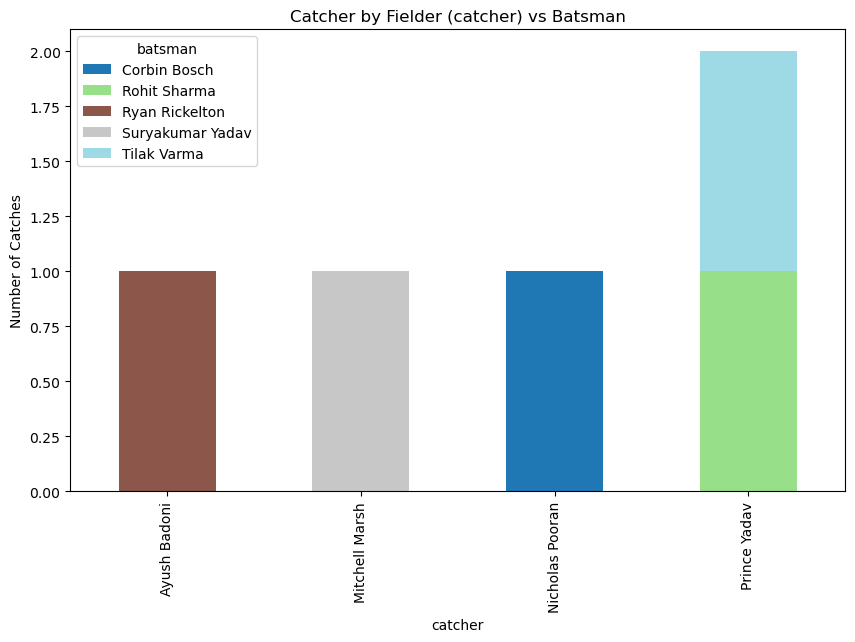

In [143]:
catch_df = batting.groupby(['catcher', 'batsman']).size().reset_index(name='catches')

pivot_df = catch_df.pivot(index='catcher', columns='batsman', values='catches').fillna(0)
display(pivot_df)
pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='tab20',
    ylabel='Number of Catches',
    title='Catcher by Fielder (catcher) vs Batsman'
)

## Analysis - Innings 2

In [144]:
batting1 = pd.DataFrame.from_records(inn2['batting'])
batting1

,batsman,dismissal,bowler,catcher,dismissal-text,r,b,4s,6s,sr,
0,"{'id': '6eaac800-13e7-4a07-8ee2-14acd04cc53f',...",catch,"{'id': '6004fd3f-2264-470d-b39f-340d530b19b3',...","{'id': 'aefd9074-da5a-408d-94f1-3be0e79d3b82',...",c tilak varma b boult,34,24,3,2,141.67,0
1,"{'id': '3fef81b0-c1e9-45eb-954f-519f3b33d640',...",catch,"{'id': '6602d875-cf56-46a3-866c-de80aaa006bc',...","{'id': '71add5ac-55f9-4eb7-9e0c-d51208ae20c0',...",c naman dhir b bumrah,9,11,2,0,81.82,0
2,"{'id': '4e8ab9cd-c5af-430e-887b-d22bf74ad052',...",catch,"{'id': 'c510fbe6-8a16-47e4-ab60-0965720241af',...","{'id': '8c579447-bfbd-4cf6-a283-db4dc1d5ac33',...",c suryakumar yadav b will jacks,27,15,1,3,180.00,0
3,"{'id': 'a52b2d20-7c98-4238-9ba4-ec78419a5cc2',...",catch,"{'id': 'c510fbe6-8a16-47e4-ab60-0965720241af',...","{'id': 'cb665f43-1f13-4ae8-acd9-8695ea5fbf9f',...",c karn sharma b will jacks,4,2,1,0,200.00,0
4,"{'id': '151d6979-05d3-4c1f-ae30-0e58af0e8613',...",catch,"{'id': '6004fd3f-2264-470d-b39f-340d530b19b3',...","{'id': 'c510fbe6-8a16-47e4-ab60-0965720241af',...",c will jacks b boult,35,22,2,2,159.09,0
5,"{'id': '2f50df2f-809d-44f9-b5be-ccb846515861',...",catch,"{'id': '6602d875-cf56-46a3-866c-de80aaa006bc',...","{'id': 'f1dea685-fa68-4339-b582-ba70839e5ca9',...",c corbin bosch b bumrah,24,16,3,0,150.00,0
6,"{'id': 'dd665f5d-04e8-436b-b376-8fd2a9b8bf8a',...",bowled,"{'id': '6602d875-cf56-46a3-866c-de80aaa006bc',...",NaN,b bumrah,2,4,0,0,50.00,0
7,"{'id': '9a71201c-c377-45aa-a355-1af6d2c4bae3',...",bowled,"{'id': 'f1dea685-fa68-4339-b582-ba70839e5ca9',...",NaN,b corbin bosch,13,14,0,2,92.86,0
8,"{'id': '332200ad-d1f8-4035-95c5-b33bd1c9a939',...",bowled,"{'id': '6602d875-cf56-46a3-866c-de80aaa006bc',...",NaN,b bumrah,0,1,0,0,0.00,0
9,"{'id': 'a67a5fef-c1d6-4264-a6a6-c1984489bd36',...",NaN,NaN,NaN,not out,4,9,0,0,44.44,0


In [145]:
batting1.batsman = pd.json_normalize(batting1.batsman)['name']
batting1.bowler = pd.json_normalize(batting1.bowler)['name']
batting1.catcher = pd.json_normalize(batting1.catcher)['name']

In [146]:
batting1

,batsman,dismissal,bowler,catcher,dismissal-text,r,b,4s,6s,sr,
0,Mitchell Marsh,catch,Trent Boult,Tilak Varma,c tilak varma b boult,34,24,3,2,141.67,0
1,Aiden Markram,catch,Jasprit Bumrah,Naman Dhir,c naman dhir b bumrah,9,11,2,0,81.82,0
2,Nicholas Pooran,catch,Will Jacks,Suryakumar Yadav,c suryakumar yadav b will jacks,27,15,1,3,180.00,0
3,Rishabh Pant,catch,Will Jacks,Karn Sharma,c karn sharma b will jacks,4,2,1,0,200.00,0
4,Ayush Badoni,catch,Trent Boult,Will Jacks,c will jacks b boult,35,22,2,2,159.09,0
5,David Miller,catch,Jasprit Bumrah,Corbin Bosch,c corbin bosch b bumrah,24,16,3,0,150.00,0
6,Abdul Samad,bowled,Jasprit Bumrah,NaN,b bumrah,2,4,0,0,50.00,0
7,Ravi Bishnoi,bowled,Corbin Bosch,NaN,b corbin bosch,13,14,0,2,92.86,0
8,Avesh Khan,bowled,Jasprit Bumrah,NaN,b bumrah,0,1,0,0,0.00,0
9,Prince Yadav,NaN,NaN,NaN,not out,4,9,0,0,44.44,0


In [147]:
bowling1 = pd.DataFrame.from_records(inn2['bowling'])
bowling1.bowler = pd.json_normalize(bowling1.bowler)['name']

In [148]:
bowling1

,bowler,o,m,r,w,nb,wd,eco
0,Trent Boult,4,0,20,3,0,0,5.0
1,Deepak Chahar,3,0,38,0,1,1,12.7
2,Jasprit Bumrah,4,0,22,4,0,1,5.5
3,Will Jacks,2,0,18,2,0,0,9.0
4,Karn Sharma,2,0,25,0,0,0,12.5
5,Hardik Pandya,1,0,10,0,0,0,10.0
6,Corbin Bosch,4,0,26,1,0,3,6.5


In [149]:
total_runs = batting1['r'].sum()
total_balls = batting1['b'].sum()
team_strike = (total_runs / total_balls) * 100
dismissals = batting1['dismissal'].notna().sum()

print(f'Total Runs: {total_runs}')
print(f'Total Balls Faced: {total_balls}')
print(f'Team Strike Rate: {team_strike:.2f}')
print(f'Total Dismissals: {dismissals}')

Total Runs: 153
Total Balls Faced: 121
Team Strike Rate: 126.45
Total Dismissals: 10


dismissal
catch     6
bowled    4
Name: count, dtype: int64


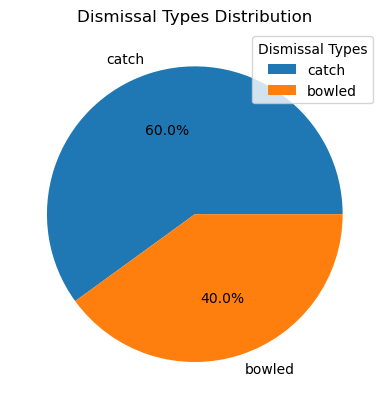

In [150]:
dismissal_counts = batting1['dismissal'].value_counts()
print(dismissal_counts)

plt.pie(
    dismissal_counts,
    labels=dismissal_counts.index,
    autopct='%1.1f%%'
)

plt.title('Dismissal Types Distribution')
plt.legend(title='Dismissal Types')

,batsman,4s,6s
0,Abdul Samad,0,0
1,Aiden Markram,2,0
2,Avesh Khan,0,0
3,Ayush Badoni,2,2
4,David Miller,3,0
5,Digvesh Singh Rathi,0,0
6,Mitchell Marsh,3,2
7,Nicholas Pooran,1,3
8,Prince Yadav,0,0
9,Ravi Bishnoi,0,2


Total 4s: 12
Total 6s: 9


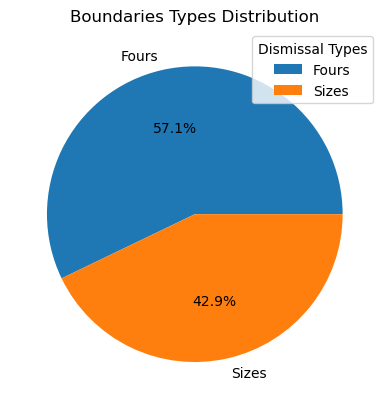

In [151]:
boundaries = batting1.groupby('batsman')[['4s', '6s']].sum().reset_index()
display(boundaries)
print(f'Total 4s: {boundaries['4s'].sum()}')
print(f'Total 6s: {boundaries['6s'].sum()}')

plt.pie(
    [boundaries['4s'].sum(), boundaries['6s'].sum()],
    labels=['Fours', 'Sizes'],
    autopct='%1.1f%%'
)

plt.title('Boundaries Types Distribution')
plt.legend(title='Dismissal Types')

### Batsman Performance

<Axes: title={'center': 'Batsman Performance (Runs)'}, xlabel='batsman', ylabel='Runs'>

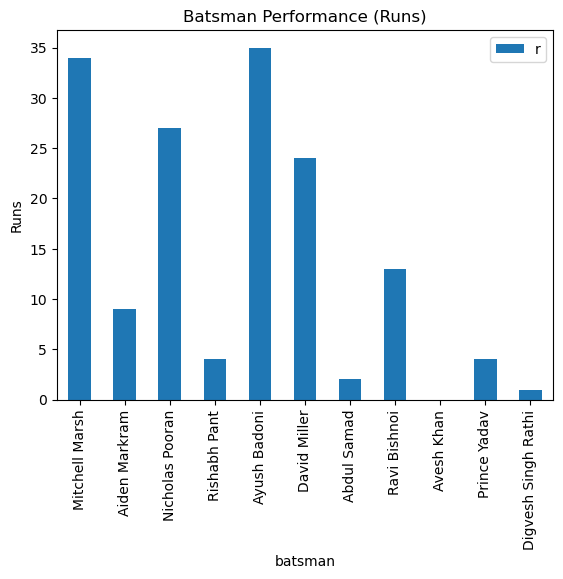

In [152]:
batting1[['batsman','r']].plot(
    kind='bar',
    x='batsman',
    ylabel='Runs',
    title='Batsman Performance (Runs)'
)

<Axes: title={'center': 'Batsman Performance (Strike Rate)'}, xlabel='batsman', ylabel='Runs'>

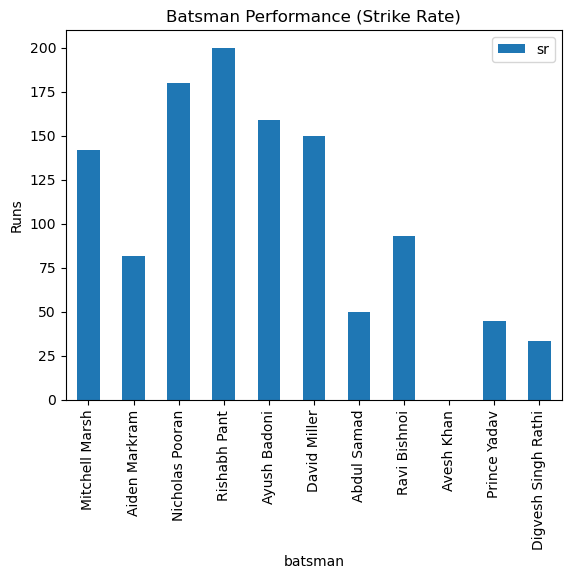

In [153]:
batting1[['batsman','sr']].plot(
    kind='bar',
    x='batsman',
    ylabel='Runs',
    title='Batsman Performance (Strike Rate)'
)

### Bowler Performance

<Axes: title={'center': 'Bowler Performance (Runs Conceded including Extras)'}, xlabel='bowler', ylabel='Runs'>

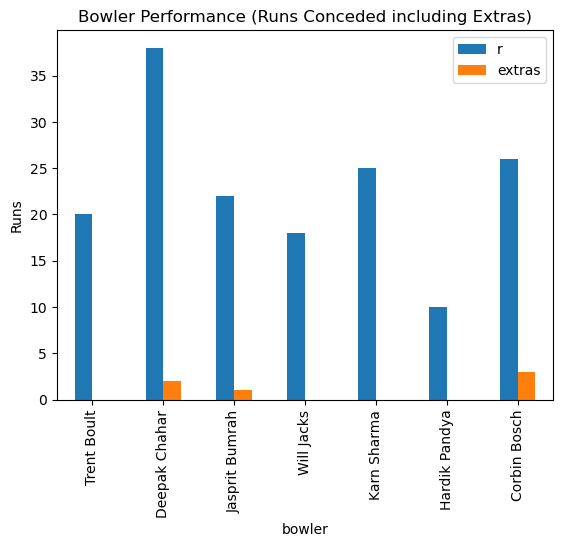

In [154]:
bowling1['extras'] = bowling1['nb'] + bowling1['wd']

bowling1[['bowler', 'r', 'extras']].plot(
    kind = 'bar',
    x = 'bowler',
    ylabel = 'Runs',
    title='Bowler Performance (Runs Conceded including Extras)'
)

<Axes: title={'center': 'Bowler Performance (Economy Rate)'}, xlabel='bowler', ylabel='Runs Economy'>

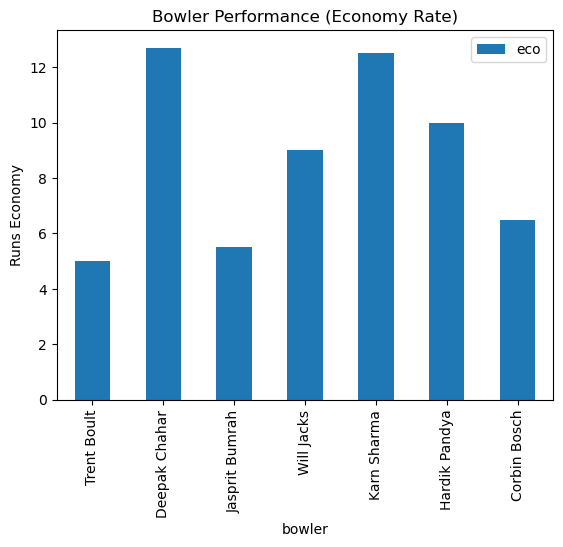

In [155]:
bowling1[['bowler','eco']].plot(
    kind='bar',
    x='bowler',
    ylabel='Runs Economy',
    title='Bowler Performance (Economy Rate)'
)

### Fielder Performance

batsman,Aiden Markram,Ayush Badoni,David Miller,Mitchell Marsh,Nicholas Pooran,Rishabh Pant
catcher,,,,,,
Corbin Bosch,0.0,0.0,1.0,0.0,0.0,0.0
Karn Sharma,0.0,0.0,0.0,0.0,0.0,1.0
Naman Dhir,1.0,0.0,0.0,0.0,0.0,0.0
Suryakumar Yadav,0.0,0.0,0.0,0.0,1.0,0.0
Tilak Varma,0.0,0.0,0.0,1.0,0.0,0.0
Will Jacks,0.0,1.0,0.0,0.0,0.0,0.0


<Axes: title={'center': 'Catcher by Fielder (catcher) vs Batsman'}, xlabel='catcher', ylabel='Number of Catches'>

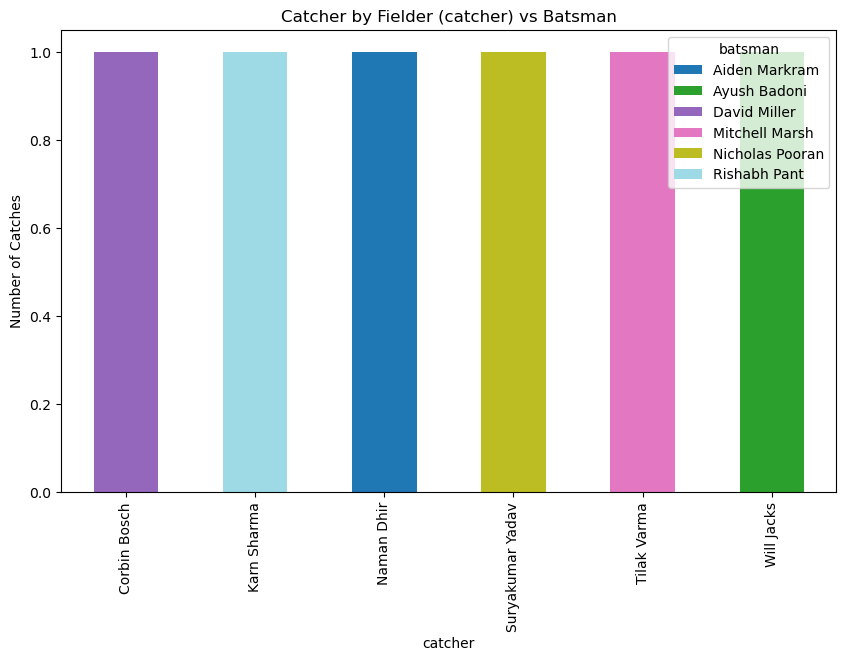

In [156]:
catch_df = batting1.groupby(['catcher', 'batsman']).size().reset_index(name='catches')

pivot_df = catch_df.pivot(index='catcher', columns='batsman', values='catches').fillna(0)
display(pivot_df)
pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='tab20',
    ylabel='Number of Catches',
    title='Catcher by Fielder (catcher) vs Batsman'
)